In [1]:
import tensorflow as tf

In [2]:
import pandas as pd

### The Kaggle file provides 4 folders: 
volcanoes_test ,  Volcanoes_test,  volcanoes_train,  Volcanoes_train

#### I check df.equals() on the training sets and they see, to be the exact same files

In [3]:
X = pd.read_csv('volcanoe-data/volcanoes_train/train_images.csv',header= None)
y = pd.read_csv('volcanoe-data/volcanoes_train/train_labels.csv')

In [95]:
y1 = pd.read_csv('volcanoe-data/volcanoes_train/train_labels.csv')

In [97]:
y1[y1['Type'].notnull()]

,Volcano?,Type,Radius,Number Volcanoes
0,1,3.0,17.46,1.0
9,1,1.0,22.02,1.0
15,1,1.0,14.76,1.0
29,1,4.0,6.40,1.0
34,1,3.0,21.63,2.0
...,...,...,...,...
6940,1,2.0,25.50,1.0
6947,1,2.0,21.10,1.0
6949,1,4.0,4.00,1.0
6975,1,3.0,27.02,1.0


#### The two y train sets seem to be exactly the same too. So, I will choose the lower case one

In [7]:
#X.head()

,0,1,2,3,4,5,6,7,8,9,...,12090,12091,12092,12093,12094,12095,12096,12097,12098,12099
0,95,101,99,103,95,86,96,89,70,104,...,111,107,92,89,103,99,117,116,118,96
1,91,92,91,89,92,93,96,101,107,104,...,103,92,93,95,98,105,104,100,90,81
2,87,70,72,74,84,78,93,104,106,106,...,84,71,95,102,94,80,91,80,84,90
3,0,0,0,0,0,0,0,0,0,0,...,94,81,89,84,80,90,92,80,88,96
4,114,118,124,119,95,118,105,116,123,112,...,116,113,102,93,109,104,106,117,111,115


In [17]:
#X.shape

(7000, 12100)

In [18]:
#y.shape

(7000, 4)

**Lets check the balence of the classes before we split our data for training**

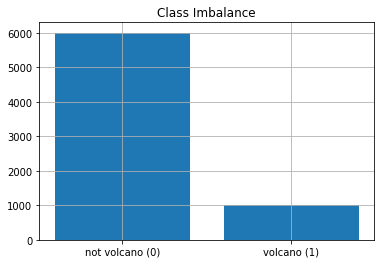

In [6]:
from src.volcano import class_imbalanced_plot
import matplotlib.pyplot as plt
class_imbalanced_plot(y)


**I will have to choose a technique for resampleing. there are sevrale ways to deal with imbalenced class:**
 - Augmentaion: create more minority class images by flipping, rotating, croping, or changing image quality of samples and saving as new samples
 - Under sampleing: by why throw out data - may cause over fitting
 - SMOTE: sintheticaly making more samples from minority class samples
 - weighting classes: (I read that this does work will woth image data)
 
**I Think what i wil do is try my model with both smoting and augmentation at some point. Firsti will go with smoteing becaseu for my spacific data set , al images are with the same exact resolutotion and croping.**

**Lets try making a few synthetic samples of volcano imahges and see who they looks**

**But first lets do a train test split**

In [5]:
from sklearn.model_selection import train_test_split

In [7]:
#X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=.20, random_state=666)

In [7]:
from src.volcano import volcano_images


In [11]:
import matplotlib.pyplot as plt



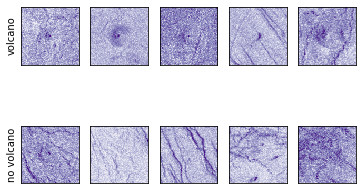

In [10]:
volcano_images(X,y)

In [4]:
import numpy as np
import pandas as pd

In [5]:


from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, MaxPool2D, Dropout



In [6]:
Xtrain =  X/256
ytrain = y['Volcano?']


In [7]:
from sklearn.model_selection import train_test_split

In [8]:
img_rows, img_cols = 110, 110

X = Xtrain.values.reshape((-1, img_rows, img_cols, 1))
y = ytrain.values
X_train, X_vali, y_train, y_vali = train_test_split(X, y, test_size = 0.2, random_state = 666)


#X_test = Xtest_raw.values.reshape((-1, img_rows, img_cols, 1))
#y_test = ytest_raw.values

In [20]:
model1 = Sequential()
model1.add(Conv2D(6, kernel_size = (3,3), activation = 'relu', input_shape = (img_rows, img_cols, 1)))
model1.add(MaxPool2D(pool_size=(2,2), strides=2))
model1.add(Conv2D(6, kernel_size = (3,3), activation = 'relu'))
model1.add(MaxPool2D(pool_size=(2,2), strides=2))
model1.add(Flatten())
model1.add(Dense(6,activation = 'relu'))
model1.add(Dense(1, activation = 'sigmoid'))

In [21]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 108, 108, 6)       60        
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 54, 54, 6)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 52, 52, 6)         330       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 26, 26, 6)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4056)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 24342     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                

In [11]:
metrics1 = ['accuracy','TruePositives', 'TrueNegatives','FalsePositives','FalseNegatives','Precision','Recall']

In [22]:
model1.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = metrics1)

In [13]:
epochs = 7
batch_size = 32

In [23]:
model1_hist = model1.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, 
                        validation_data=(X_vali, y_vali)
                       )


Epoch 1/7
175/175 [==============================] - 13s 76ms/step - loss: 0.4313 - accuracy: 0.8552 - true_positives: 8.0000 - true_negatives: 4781.0000 - false_positives: 24.0000 - false_negatives: 787.0000 - precision: 0.2500 - recall: 0.0101 - val_loss: 0.4083 - val_accuracy: 0.8536 - val_true_positives: 0.0000e+00 - val_true_negatives: 1195.0000 - val_false_positives: 0.0000e+00 - val_false_negatives: 205.0000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/7
175/175 [==============================] - 15s 83ms/step - loss: 0.4069 - accuracy: 0.8580 - true_positives: 0.0000e+00 - true_negatives: 4805.0000 - false_positives: 0.0000e+00 - false_negatives: 795.0000 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.4126 - val_accuracy: 0.8536 - val_true_positives: 0.0000e+00 - val_true_negatives: 1195.0000 - val_false_positives: 0.0000e+00 - val_false_negatives: 205.0000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/7
175/175 [======================

In [18]:
import matplotlib.pyplot as plt

In [24]:
from src.volcano import lr_plot

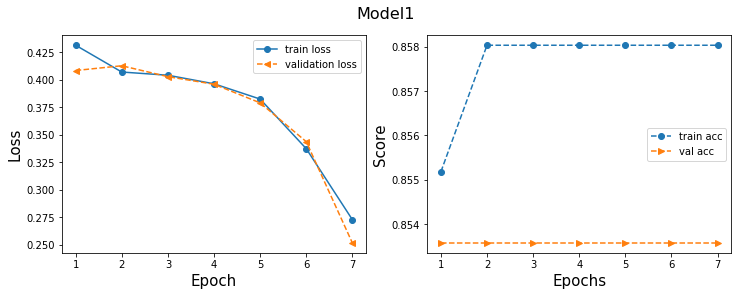

In [25]:
lr_plot(model1_hist,'Model1')

trying amodel with dropout

In [51]:
modelCNN1 = Sequential()
modelCNN1.add(Conv2D(6, kernel_size = (3,3), activation = 'relu', input_shape = (img_rows, img_cols, 1)))
modelCNN1.add(MaxPool2D(pool_size=(2,2), strides=2))
modelCNN1.add(Dropout(0.5))
modelCNN1.add(Conv2D(12, kernel_size = (3,3), activation = 'relu'))
modelCNN1.add(MaxPool2D(pool_size=(2,2), strides=2))
modelCNN1.add(Dropout(0.5))
modelCNN1.add(Flatten())
modelCNN1.add(Dense(12,activation = 'relu'))
modelCNN1.add(Dense(1, activation = 'sigmoid'))

In [17]:
modelCNN1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 108, 108, 6)       60        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 54, 54, 6)         0         
_________________________________________________________________
dropout (Dropout)            (None, 54, 54, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 52, 52, 12)        660       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 26, 26, 12)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 26, 26, 12)        0         
_________________________________________________________________
flatten (Flatten)            (None, 8112)              0

In [52]:

metrics2 = ['Precision','Recall','accuracy']

In [53]:
modelCNN1.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = metrics1)

In [54]:
epochs =15
batch_size = 32

In [55]:
model3 = modelCNN1.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, 
                        validation_data=(X_vali, y_vali)
                       )


Epoch 1/15
175/175 [==============================] - 12s 71ms/step - loss: 0.4191 - accuracy: 0.8570 - true_positives: 1.0000 - true_negatives: 4798.0000 - false_positives: 7.0000 - false_negatives: 794.0000 - precision: 0.1250 - recall: 0.0013 - val_loss: 0.6398 - val_accuracy: 0.8536 - val_true_positives: 0.0000e+00 - val_true_negatives: 1195.0000 - val_false_positives: 0.0000e+00 - val_false_negatives: 205.0000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/15
175/175 [==============================] - 13s 75ms/step - loss: 0.4069 - accuracy: 0.8580 - true_positives: 0.0000e+00 - true_negatives: 4805.0000 - false_positives: 0.0000e+00 - false_negatives: 795.0000 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6395 - val_accuracy: 0.8536 - val_true_positives: 0.0000e+00 - val_true_negatives: 1195.0000 - val_false_positives: 0.0000e+00 - val_false_negatives: 205.0000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/15
175/175 [====================

In [19]:
modelCNN1.save("model3.h5")
print("Saved model to disk")

Saved model to disk


In [104]:
historyCNN1 = model3.history

In [56]:
import pickle

with open('trainhistory/history3', 'wb') as file_pi:
        pickle.dump(historyCNN1, file_pi)

In [103]:
modelCNN1.history


''

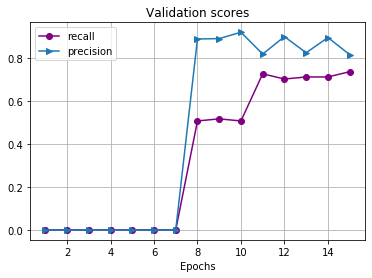

In [58]:
epochs = list(range(1,len(historyCNN1['loss'])+1))
#prec = history3['val_true_positives']/(history3['val_true_positives']+history3['val_false_positives'])
plt.plot(epochs,historyCNN1['val_recall'],'-o',label='recall',color='Purple')
plt.plot(epochs,historyCNN1['val_precision'],'->',label='precision')
#plt.plot(epochs,history3['val_true_negatives'],'-+',label='TN')
#plt.plot(epochs,history3['val_false_negatives'],'-s',label='FN')
plt.title('Validation scores')
plt.grid()
plt.legend()
plt.xlabel('Epochs')
plt.savefig('images/CNN3_val_scores.png')
;

In [26]:
import numpy as np
import matplotlib.pyplot as plt


In [32]:
from src.volcano import lr_plot

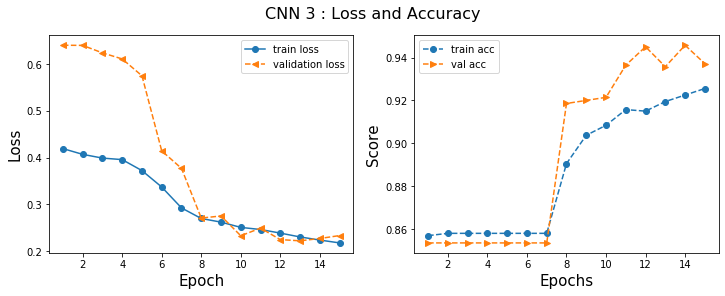

In [107]:

lr_plot(model3,'CNN 3 : Loss and Accuracy')


In [ ]:
val_results = model3.evaluate()

In [66]:
tp15 = historyCNN1['val_true_positives'][-1]
tn15 =  historyCNN1['val_true_negatives'][-1]
fp15 =  historyCNN1['val_false_positives'][-1]
fn15 = historyCNN1['val_false_negatives'][-1]

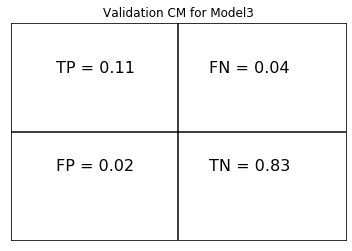

In [92]:

plt.plot()
plt.xticks([])
plt.yticks([])
plt.axhline(.5,color='k')
plt.axvline(.5,color='k')
#fig.suptite('Validation Confusion')
plt.text(.1,.8,f'TP = {round(tp15/(tp15+tn15+fp15+fn15),2)}',size=16)
plt.text(.1,.3,f'FP = {round(fp15/(tp15+tn15+fp15+fn15),2)}',size=16)
plt.text(.6,.8,f'FN = {round(fn15/(tp15+tn15+fp15+fn15),2)}',size=16)
plt.text(.6,.3,f'TN = {round(tn15/(tp15+tn15+fp15+fn15),2)}',size=16)
plt.title('Validation CM for Model3')
plt.savefig('images/cm_3_15.png')

In [11]:
import pandas as pd

In [12]:
X_holdout = pd.read_csv('volcanoe-data/volcanoes_test/test_images.csv',header= None)
y_holdout = pd.read_csv('volcanoe-data/volcanoes_test/test_labels.csv')


In [14]:
Xhold =  X_holdout/256
yhold = y_holdout['Volcano?']
Xhold = Xhold.values.reshape((-1, 110, 110, 1))
yhold = yhold.values

In [112]:
#running one epoch to retrieve lost history object
holdout_results = modelCNN1.evaluate(Xhold,yhold)

86/86 [==============================] - 2s 29ms/step - loss: 0.2260 - accuracy: 0.9294 - true_positives: 321.0000 - true_negatives: 2220.0000 - false_positives: 80.0000 - false_negatives: 113.0000 - precision: 0.8005 - recall: 0.7396


In [115]:
score_list = ['loss','acc','tps','tns','fps','fns','prec','recall']

In [114]:
holdout_results

[0.22599050402641296,
 0.9294074773788452,
 321.0,
 2220.0,
 80.0,
 113.0,
 0.8004987239837646,
 0.7396313548088074]

In [116]:
for score,num in zip(score_list,holdout_results):
    print(f'{score} : {num}')

loss : 0.22599050402641296
acc : 0.9294074773788452
tps : 321.0
tns : 2220.0
fps : 80.0
fns : 113.0
prec : 0.8004987239837646
recall : 0.7396313548088074


In [7]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import load_model

In [9]:
model = load_model('model3.h5')

In [16]:
pred = model(Xhold)

In [136]:
max(pred)

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.60720724], dtype=float32)>

In [38]:
cm = tf.math.confusion_matrix(yhold,pred_binary,num_classes=2)

In [39]:
cm

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[2300,    0],
       [ 434,    0]], dtype=int32)>

The matrix columns represent the prediction labels and the rows represent the real labels

In [30]:
import matplotlib.pyplot as plt

In [49]:
import numpy as np
cm22 = np.array([[321,80],[113,2220]])
# [[tp,fp],[fn,fn]]

In [50]:
cm_norm = cm22/sum(cm2)

''

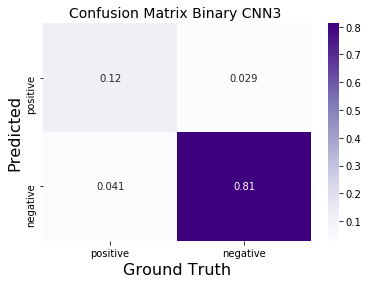

In [75]:
import seaborn as sns

sns.heatmap(cm_norm,annot=True,cmap='Purples')
plt.xticks([.5,1.5],['positive','negative'])
plt.xlabel('Ground Truth',size=16)
plt.yticks([.5,1.5],['positive','negative'])
plt.ylabel('Predicted',size=16)
plt.title('Confusion Matrix Binary CNN3 ',size=14)
plt.savefig('images/cm3.png')
;

In [88]:
#y_probas = tf.sigmoid(pred)

In [89]:
#y_probas.shape

TensorShape([2734, 1])

In [156]:
#y_percent_prob = y_probas.numpy().flatten()*100

In [158]:
idxs = np.random.choice(list(range(1,2735)),10)

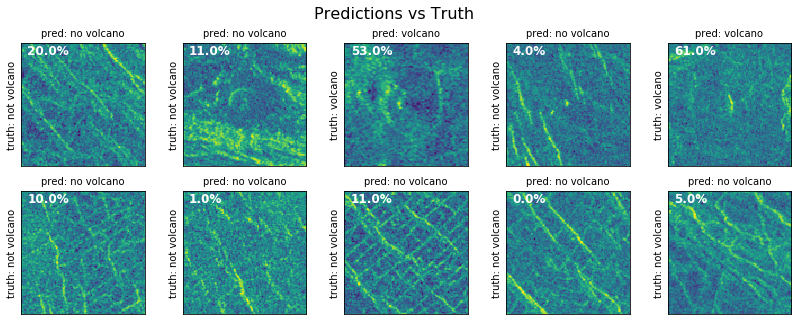

In [241]:
pred_np = pred.numpy().flatten()*100
fig, axs = plt.subplots(2,5,figsize=(14,5))
for i, ax in enumerate(axs.flatten()):
    ax.imshow(X_holdout.iloc[idxs[i],:].values.reshape(110,110))
    ax.set_xticks([])
    ax.set_yticks([])
    if pred.numpy().flatten()[i] > .5:
        ax.set_title(f'pred: volcano',size=10)
    if pred.numpy().flatten()[i] < .5:
        ax.set_title(f'pred: no volcano',size=10)
    
    if yhold[i] == 0:
        ax.set_ylabel('truth: not volcano')
        #ax.text(1,-.7,f'not volcano')
    if yhold[i] == 1:
        #ax.text(1,-.7,'volcano')
        ax.set_ylabel('truth: volcano')
    ax.text(5,10,f'{round(pred_np[i])}%',color='w',fontsize='large',weight='bold')
fig.suptitle('Predictions vs Truth',size=16)

#plt.savefig('images/pred_vs_truth.png')


        
    
    
    

In [102]:
type(Xhold)

numpy.ndarray

In [127]:
X_holdout.iloc[0,:].values.reshape(110,110).shape

(110, 110)

In [149]:
pred.numpy().flatten()[0]


0.19853908

''

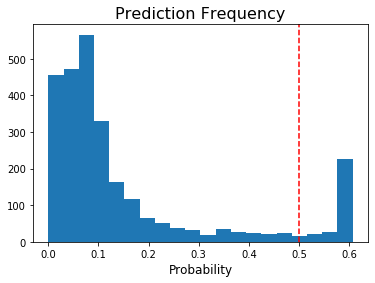

In [247]:
plt.hist(pred.numpy().flatten(),bins=20)
plt.title('Prediction Frequency',size=16)
plt.xlabel('Probability',size=12)
plt.axvline(.5,color='r',linestyle='--')
plt.savefig('images/prob_freq.png')
;

In [207]:
holdout_results = model.evaluate(Xhold,yhold)

86/86 [==============================] - 3s 38ms/step - loss: 0.2318 - precision: 0.8881 - recall: 0.5853 - accuracy: 0.0000e+00


In [208]:
holdout_results

[0.23177634179592133, 0.8881118893623352, 0.5852534770965576, 0.0]